# Laboration deep learning

## 0. EDA och filhantering

### a)

### b)

In [75]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import os

current_path = Path().absolute()
print(f"{current_path = }")

current_path = PosixPath('/kaggle/working')


In [3]:
!ls ..

input  lib  working


In [5]:
import matplotlib.pyplot as plt

data_path = current_path / "original_data" / "train" / "train"

image_paths = [f for f in os.listdir(data_path)]

# https://stackoverflow.com/questions/49280966/pulling-random-files-out-of-a-folder-for-sampling

images_random = [(plt.imread(data_path / i), i) for i in (np.random.choice(image_paths, 10))]

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/original_data/train/train'

In [ ]:
plt.imshow(images_random[0][0])

In [ ]:
import matplotlib.pyplot as plt

labels = ["dog", "cat"]

fig, axes = plt.subplots(2,5, figsize=(12,8))

for ax, image in zip(axes.flatten(), images_random):
    ax.imshow(image[0])
    # https://stackoverflow.com/questions/47684802/to-check-if-filename-has-substring-of-a-word-in-a-list
    for label in labels:
        if label in image[1]:
            ax.set_title(f"{label}")
    ax.axis("off")

### c)

In [ ]:
for size in ("small", "tiny"):
    newdir = current_path / f"experiment_{size}_data"
    if not os.path.exists(newdir):
        os.makedirs(newdir)
    for split in ("test", "train", "val"):
        splitdir = newdir / split
        if not os.path.exists(splitdir):
            os.makedirs(splitdir)


### d)

In [ ]:
cat_paths = [str(path) for path in data_path.glob("*.jpg")][:12500]
dog_paths = [str(path) for path in data_path.glob("*.jpg")][12500:]
cat_paths[12499], dog_paths[12499]

In [ ]:
cat_small = np.random.choice(cat_paths, 1250, replace=False)
dog_small = np.random.choice(dog_paths, 1250, replace=False)
len(cat_small), len(dog_small)

In [ ]:
len(cat_small)

In [ ]:
from itertools import islice
# https://www.geeksforgeeks.org/python-split-list-in-uneven-groups/
test_sizes = [250, 800, 200]

temp = iter(cat_small)
cat_split = [list(islice(temp, 0, ele)) for ele in test_sizes]

len(cat_split[1])

In [ ]:
temp = iter(dog_small)
dog_split = [list(islice(temp, 0, ele)) for ele in test_sizes]

len(dog_split[2])

In [ ]:
for cat in cat_split:
    print(len(cat))

In [ ]:
import shutil
# https://stackoverflow.com/questions/123198/how-to-copy-files

dirs = ("test", "train", "val")
#for dir, splits in zip(dirs, cat_split):
    #for path in splits:
        #shutil.copy2(path, current_path / "experiment_small_data" / dir)

#for dir, splits in zip(dirs, dog_split):
    #for path in splits:
        #shutil.copy2(path, current_path / "experiment_small_data" / dir)
    

### e)

In [76]:
data_path = current_path / "experiment_small_data" / "test"
if "KAGGLE_KERNEL_RUN_TYPE" in os.environ:
    data_path = Path().absolute().parent / "input" / "test-data"
test_paths = [str(path) for path in data_path.glob("*.jpg")]
np.random.seed(42)
np.random.shuffle(test_paths)
len(test_paths)

500

In [77]:
data_path = current_path / "experiment_small_data" / "train"
if "KAGGLE_KERNEL_RUN_TYPE" in os.environ:
    data_path = Path().absolute().parent / "input" / "train-data"
train_paths = [str(path) for path in data_path.glob("*.jpg")]
np.random.shuffle(train_paths)
len(train_paths)

1600

In [78]:
data_path = current_path / "experiment_small_data" / "val"
if "KAGGLE_KERNEL_RUN_TYPE" in os.environ:
    data_path = Path().absolute().parent / "input" / "val-data"
val_paths = [str(path) for path in data_path.glob("*.jpg")]
np.random.shuffle(val_paths)
len(val_paths)

400

In [79]:
len(train_paths)

1600

In [80]:
y_test = np.array([int("dog" in path) for path in test_paths])
y_train = np.array([int("dog" in path) for path in train_paths])
y_val = np.array([int("dog" in path) for path in val_paths])
len(y_test), len(y_train), len(y_val)

(500, 1600, 400)

In [81]:
image_test = [plt.imread(path) for path in test_paths[:10]]
image_labels = y_test[:10]
len(image_test), len(image_labels)

(10, 10)

<bound method Figure.tight_layout of <Figure size 1200x800 with 10 Axes>>

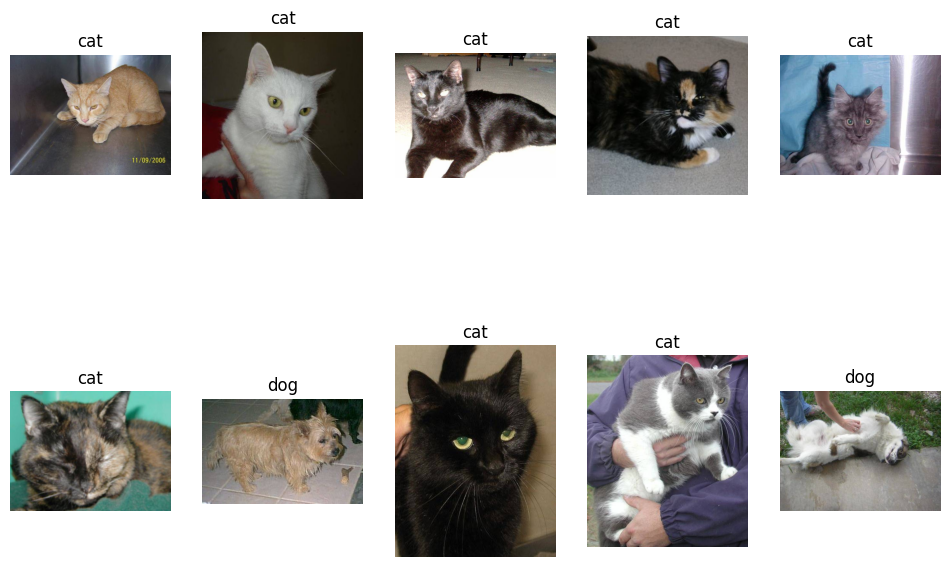

In [82]:
labels = ["cat", "dog"]

fig, axes = plt.subplots(2,5, figsize=(12,8))
for i , ax in enumerate(axes.flatten()):
    ax.imshow(image_test[i])
    ax.axis("off")
    ax.set_title(labels[image_labels[i]])

fig.tight_layout

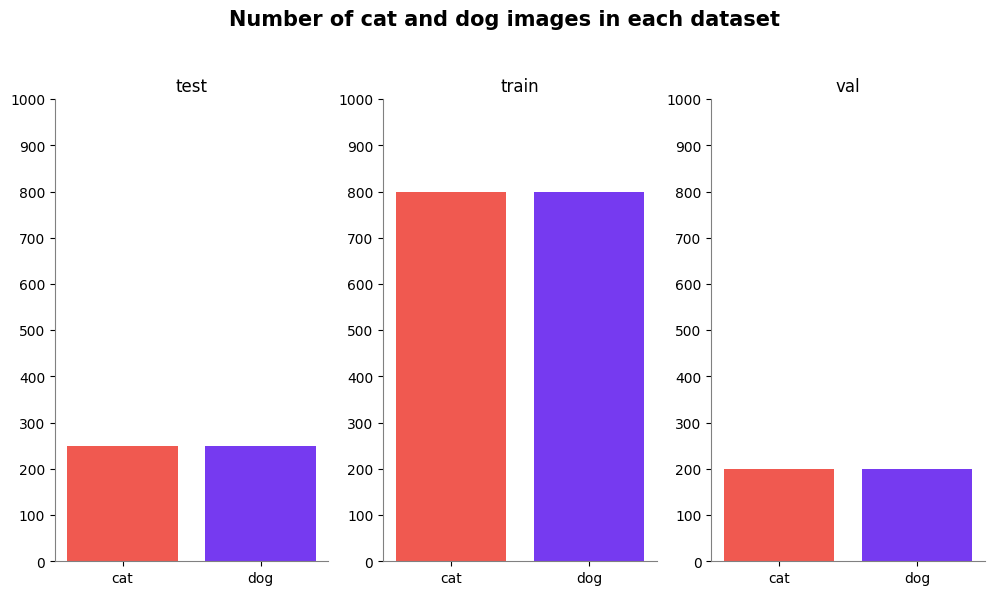

In [83]:
dirs = ("test", "train", "val")

fig, axes = plt.subplots(1, 3, figsize=(12, 6))
for dir, ax in zip(dirs, axes):
    x = ["cat", "dog"]
    ax.set_title(dir)
    if dir == "test":
        y = [np.count_nonzero(y_test == i) for i in range(2)]
    elif dir == "train":
        y = [np.count_nonzero(y_train == i) for i in range(2)]
    elif dir == "val":
        y = [np.count_nonzero(y_val == i) for i in range(2)]
    ax.bar(x, y, color=["#F05950", "#763AF0"])
    ax.set_yticks(range(0, 1001, 100))
    ax.spines[["top", "right"]].set_visible(False)
    ax.spines[["bottom", "left"]].set_color("GRAY")

    fig.suptitle(
        "Number of cat and dog images in each dataset",
        y=1.03,
        fontweight="bold",
        fontsize=15,
    )

In [84]:
y_train[:20]

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0])

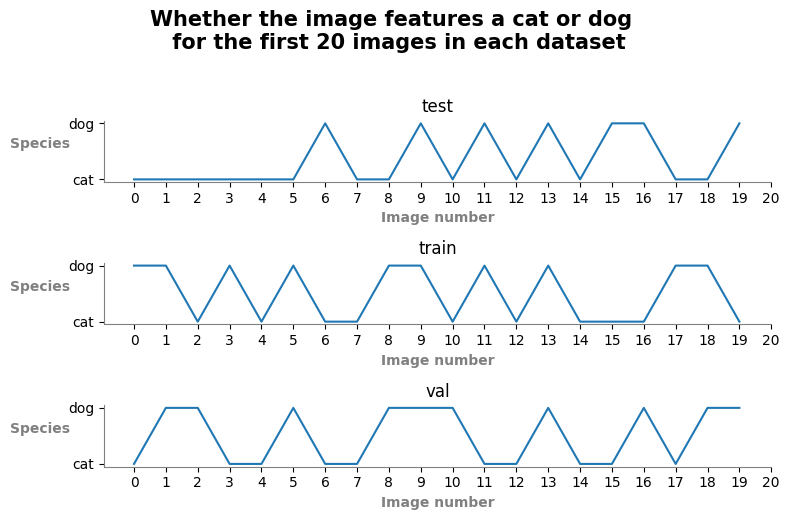

In [85]:
dirs = ("test", "train", "val")

fig, axes = plt.subplots(3, 1, figsize=(8, 5))
for dir, ax in zip(dirs, axes):
    x = range(20)
    ax.set_title(dir)
    if dir == "test":
        y = y_test[:20]
    elif dir == "train":
        y = y_train[:20]
    elif dir == "val":
        y = y_val[:20]
    ax.plot(x, y)
    ax.set_yticks(ticks=range(0, 2), labels=("cat", "dog"))
    ax.set_xticks(ticks=range(0, 21, 1))
    ax.spines[["top", "right"]].set_visible(False)
    ax.spines[["bottom", "left"]].set_color("GRAY")
    ax.set_xlabel("Image number", color="GRAY", fontweight="bold")
    ax.set_ylabel("Species", rotation=0, labelpad=20, color="GRAY", fontweight="bold")

    fig.suptitle(
        "Whether the image features a cat or dog \n for the first 20 images in each dataset",
        y=1.03,
        fontweight="bold",
        fontsize=15,
    )

fig.tight_layout()

## 1. Bildbehandling

### a)

In [86]:
train_images = [plt.imread(path) for path in train_paths]
len(train_images)

1600

In [87]:
heights = [image.shape[0] for image in train_images]
widths = [image.shape[1] for image in train_images]
heights[:5], widths[:5]

([500, 488, 375, 149, 210], [347, 500, 499, 200, 279])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


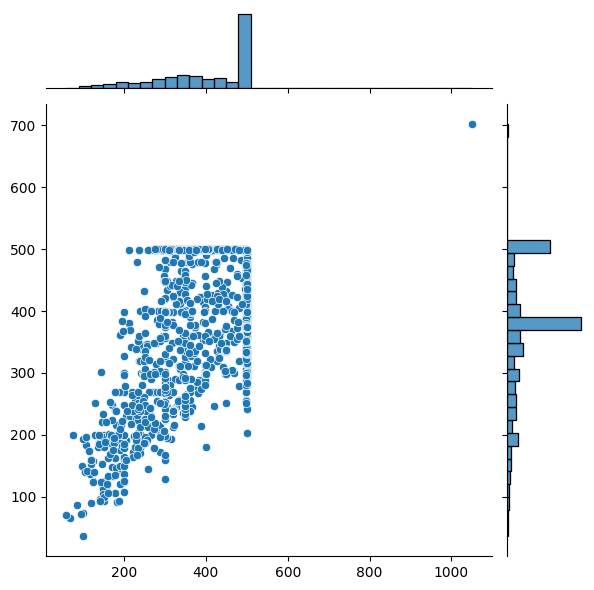

In [88]:
import seaborn as sns 

sns.jointplot(x=widths, y=heights)

### b)

Såg snabbt över bilderna och bytte manuellt ut ett par som inte föreställde varken en hund eller katt (dog.8898, dog.4367)

In [89]:
# Check how many images has a height and/or width that's smaller than 100px
res_too_small = []
for idx in range(0, len(heights)) :
    if heights[idx] < 150 or widths[idx] < 150:
        res_too_small.append(idx)

len(res_too_small), res_too_small[:5]

(74, [3, 11, 15, 31, 98])

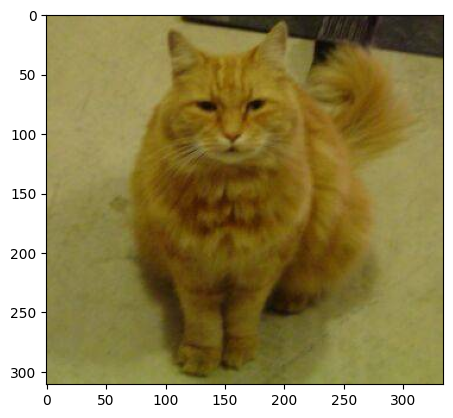

In [90]:
# Example image with subpar resolution
plt.imshow(train_images[141])

In [91]:
# Check how many images that has a height of 1.75 or more times its width and vice versa
res_bad_ratio = []
for idx in range(0, len(heights)) :
    if heights[idx] > 2*widths[idx] or widths[idx] > 1.5*heights[idx]:
        res_bad_ratio.append(idx)

len(res_bad_ratio), res_bad_ratio[:5]

(97, [31, 46, 63, 107, 123])

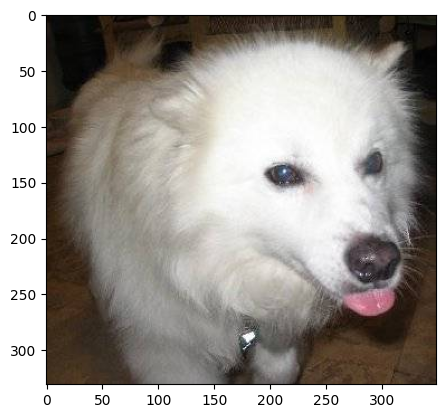

In [92]:
# Example image with subpar aspect ratio
plt.imshow(train_images[298])

In [93]:
# Check how many of the images are taller, wider or have the same ratio
taller, wider, same = 0, 0, 0
for idx in range(0, len(heights)) :
    if heights[idx] > widths[idx]:
        taller += 1
    elif widths[idx] > heights[idx]:
        wider += 1
    else:
        same +=1

taller, wider, same

(546, 1049, 5)

In [94]:
# Check average height and width
np.average(heights), np.average(widths)

(363.1575, 399.710625)

In [95]:
# Check most common height and width
for w in (heights, widths):
    unique, counts = np.unique(w, return_counts=True)
    print(unique[np.argmax(counts)])

374
499


###
En lämplig bildstorlek skulle kunna vara ca 400x450 eftersom det är runt den storleken de flesta bilderna är och att bilderna generellt är bredare så kan det vara värt att skeva hur de förvrängs mer åt det hållet. Jag tänker att bilder som har mindre upplösning än 100px i någon riktning kan slängas och att bilder som har för stor skillnad i höjd och bredd nog också kan vara värt att göra så med.

In [96]:
def get_desired_paths(dir, min_size, max_ratio):
    data_path = current_path / "experiment_small_data" / dir
    if "KAGGLE_KERNEL_RUN_TYPE" in os.environ:
        data_path = Path().absolute().parent / "input" / f"{dir}-data"
    paths = [str(path) for path in data_path.glob("*.jpg")]
    np.random.seed(42)
    np.random.shuffle(paths)

    images = [plt.imread(path) for path in paths]
    heights = [image.shape[0] for image in images]
    widths = [image.shape[1] for image in images]

    res_too_small = []
    for idx in range(0, len(heights)):
        if heights[idx] < min_size or widths[idx] < min_size:
            res_too_small.append(idx)

    res_bad_ratio = []
    for idx in range(0, len(heights)):
        if (
            heights[idx] > max_ratio * widths[idx]
            or widths[idx] > max_ratio * heights[idx]
        ):
            res_bad_ratio.append(idx)

    subpar_images_idx = res_too_small + list(set(res_bad_ratio) - set(res_too_small))
    subpar_images_paths = [paths[idx] for idx in subpar_images_idx]
    new_paths = list(set(paths) - set(subpar_images_paths))

    y = np.array([int("dog" in path) for path in new_paths])

    return new_paths, y

In [97]:
pruned_test_paths, pruned_y_test = get_desired_paths("test", 150, 1.5)
len(pruned_test_paths), len(pruned_y_test)

(412, 412)

In [98]:

pruned_val_paths, pruned_y_val = get_desired_paths("val", 150, 1.5)
len(pruned_val_paths), len(pruned_y_val)

(344, 344)

In [99]:
pruned_train_paths, pruned_y_train = get_desired_paths("train", 150, 1.5)
len(pruned_train_paths), len(pruned_y_train)

(1379, 1379)

In [100]:
pruned_image_test = [plt.imread(path) for path in pruned_test_paths[:10]]
pruned_image_labels = pruned_y_test[:10]
len(pruned_image_test), len(pruned_image_labels)

(10, 10)

<bound method Figure.tight_layout of <Figure size 1200x800 with 10 Axes>>

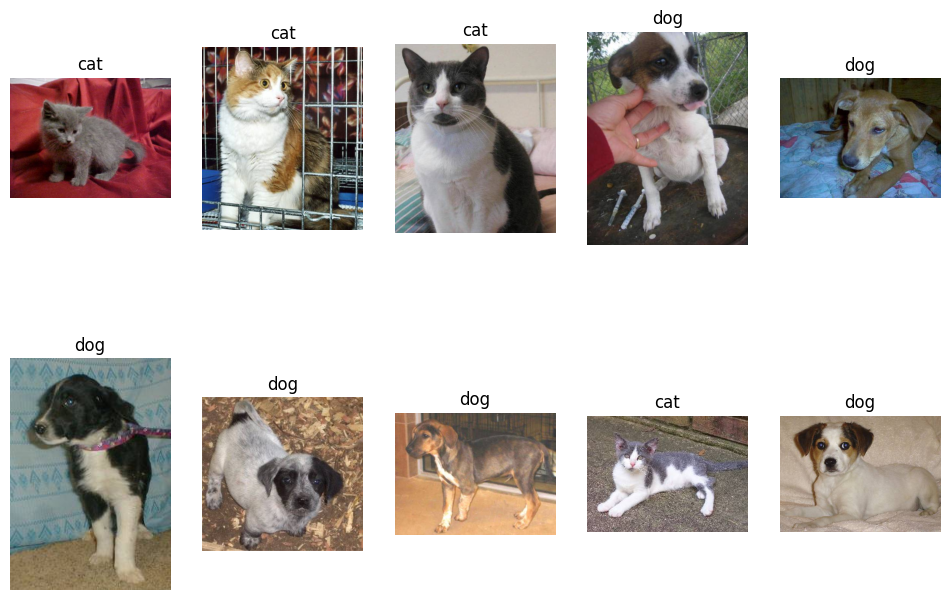

In [101]:
labels = ["cat", "dog"]

fig, axes = plt.subplots(2,5, figsize=(12,8))
for i , ax in enumerate(axes.flatten()):
    ax.imshow(pruned_image_test[i])
    ax.axis("off")
    ax.set_title(labels[pruned_image_labels[i]])

fig.tight_layout

### c)

In [102]:
import cv2

def get_resized_images(data_path, width, height):
    images = [plt.imread(path) for path in data_path]
    resized_images = np.array([cv2.resize(image, (width, height)) for image in images])
    return resized_images

In [103]:
resized_test_images = get_resized_images(pruned_test_paths, 350, 300)
len(resized_test_images)

412

In [104]:
resized_train_images = get_resized_images(pruned_train_paths, 350, 300)
len(resized_train_images)

1379

In [105]:
resized_val_images = get_resized_images(pruned_val_paths, 350, 300)
len(resized_val_images)

344

In [106]:
resized_image_test = resized_test_images[:10]

<bound method Figure.tight_layout of <Figure size 1200x800 with 10 Axes>>

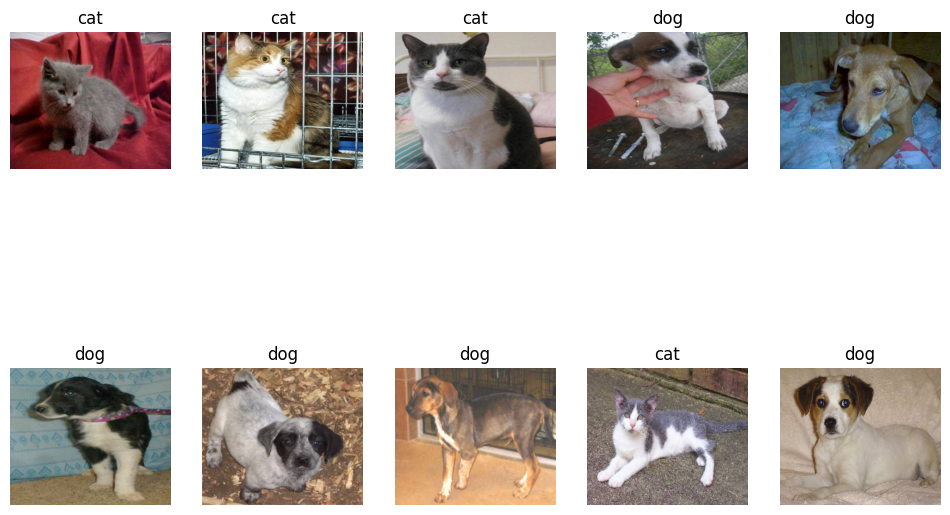

In [107]:
labels = ["cat", "dog"]

fig, axes = plt.subplots(2,5, figsize=(12,8))
for i , ax in enumerate(axes.flatten()):
    ax.imshow(resized_image_test[i])
    ax.axis("off")
    ax.set_title(labels[pruned_image_labels[i]])

fig.tight_layout

In [108]:
resized_image_test = resized_val_images[:10]
pruned_image_labels = pruned_y_val[:10]

<bound method Figure.tight_layout of <Figure size 1200x800 with 10 Axes>>

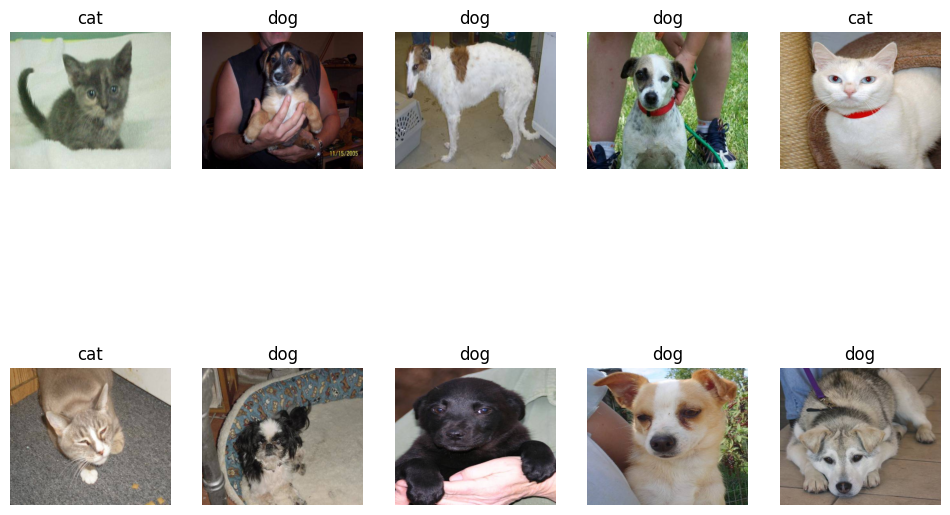

In [109]:
labels = ["cat", "dog"]

fig, axes = plt.subplots(2,5, figsize=(12,8))
for i , ax in enumerate(axes.flatten()):
    ax.imshow(resized_image_test[i])
    ax.axis("off")
    ax.set_title(labels[pruned_image_labels[i]])

fig.tight_layout

## 2. Träna modeller

In [110]:
resized_test_images[1].shape

(300, 350, 3)

In [111]:
resized_test_images[1].flatten().min(), resized_test_images[1].flatten().max()

(0, 255)

In [112]:
x_test = resized_test_images.astype("float32")/255
x_train = resized_train_images.astype("float32")/255
x_val = resized_val_images.astype("float32")/255
x_test.max(), x_test.min(), x_val.max()

(1.0, 0.0, 1.0)

In [113]:
x_train.shape[1:]

(300, 350, 3)

In [114]:
x_train.flatten().min(), x_train.flatten().max()

(0.0, 1.0)

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam


def my_model(learning_rate=0.001, dropout_rate=0.5, kernels=[32,64,128, 128]):

    adam = Adam(learning_rate=learning_rate)
    model = Sequential(name="CNN_model")

    for kernel in kernels:
        conv_layer = Conv2D(
            kernel, 
            kernel_size=(3, 3),  
            activation="relu", 
            kernel_initializer="he_normal",  
            input_shape=x_train.shape[1:],
        )

        model.add(conv_layer)
        model.add(
            MaxPooling2D(pool_size=(2, 2), strides=2)
        ) 

  
    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(512, activation="relu", kernel_initializer="he_normal"))
    model.add(
        Dense(1, activation="sigmoid")
    ) 

    model.compile(
        loss="binary_crossentropy", optimizer=adam, metrics=["acc"]
    )

    return model

model = my_model()
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 298, 348, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 149, 174, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 147, 172, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 73, 86, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 71, 84, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 35, 42, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 33, 40, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 16, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 40960)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 40960)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │    20,972,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,213,377 (80.92 MB)

 Trainable params: 21,213,377 (80.92 MB)

 Non-trainable params: 0 (0.00 B)

In [116]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=5)

y_train = pruned_y_train
y_val = pruned_y_val

model.fit(
    x_train,
    y_train,
    epochs=100,
    callbacks=[early_stopper],
    validation_data= (x_val, y_val)
)

Epoch 1/100
 1/44 ━━━━━━━━━━━━━━━━━━━━ 2:54 4s/step - acc: 0.3125 - loss: 0.8607

W0000 00:00:1716497421.390562    4547 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - acc: 0.4762 - loss: 4.2378

W0000 00:00:1716497427.761258    4547 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716497429.339454    4546 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - acc: 0.4767 - loss: 4.1841 - val_acc: 0.4855 - val_loss: 0.6968
Epoch 2/100
 1/44 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - acc: 0.5625 - loss: 0.6742

W0000 00:00:1716497429.978145    4546 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.4896 - loss: 0.6959 - val_acc: 0.5378 - val_loss: 0.6894
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - acc: 0.5766 - loss: 0.6826 - val_acc: 0.5000 - val_loss: 0.6970
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.5629 - loss: 0.6845 - val_acc: 0.5988 - val_loss: 0.6744
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.6354 - loss: 0.6332 - val_acc: 0.5988 - val_loss: 0.6837
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.6537 - loss: 0.6264 - val_acc: 0.6134 - val_loss: 0.6849
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.7042 - loss: 0.5601 - val_acc: 0.5901 - val_loss: 0.6932
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.7620 - loss: 0.5015 - val_acc: 0.6047 - val_loss: 0.6941
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.7834 - loss: 0.4250 - val_acc: 0.6134 - val_loss: 0.7781


In [117]:
import pandas as pd

metrics= pd.DataFrame(model.history.history)
metrics.head()

,acc,loss,val_acc,val_loss
0,0.497462,1.821742,0.485465,0.696812
1,0.502538,0.694841,0.537791,0.689355
2,0.573604,0.683045,0.500000,0.697021
3,0.585932,0.677374,0.598837,0.674419
4,0.634518,0.635948,0.598837,0.683700


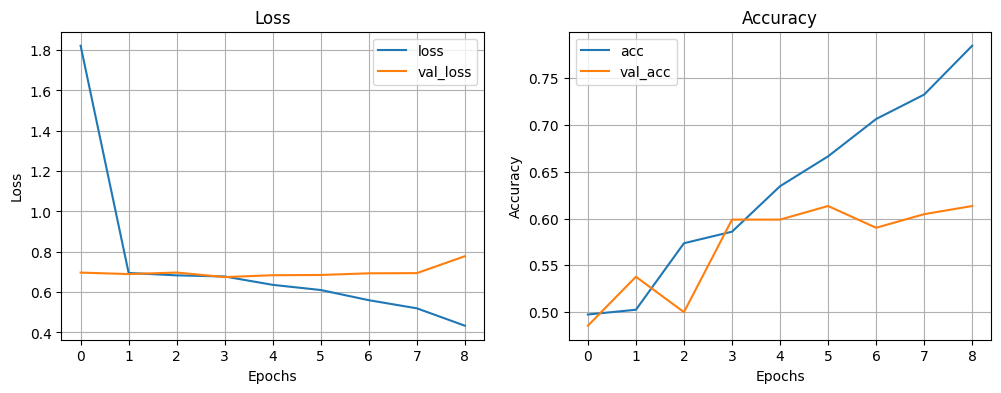

In [118]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True, xlabel="Epochs", ylabel="Loss")
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True, xlabel="Epochs", ylabel="Accuracy")

plot_metrics(metrics)

In [126]:
def evaluate_model(**kwargs):
    early_stopper = EarlyStopping(
        monitor="val_loss", mode="min", patience=5, restore_best_weights=True
    )
    model = my_model(**kwargs)
    model.fit(
        x_train,
        y_train,
        epochs=10,
        callbacks=[early_stopper],
        validation_data=(x_val, y_val)
    )

    metrics = pd.DataFrame(model.history.history)
    val_acc = metrics["val_acc"].iloc[-1]

    return val_acc

In [130]:
dropout_accuracies = {}

for dropout_rate in np.arange(.1,.6,.1):
    dropout_rate = np.round(dropout_rate,1)
    dropout_accuracies[dropout_rate] = evaluate_model(dropout_rate=dropout_rate)

Epoch 1/10
 1/44 ━━━━━━━━━━━━━━━━━━━━ 2:53 4s/step - acc: 0.5312 - loss: 0.8212

W0000 00:00:1716497865.422466    4547 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - acc: 0.4988 - loss: 4.9723

W0000 00:00:1716497871.869562    4545 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716497873.430545    4547 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - acc: 0.4988 - loss: 4.9084 - val_acc: 0.5145 - val_loss: 0.6926
Epoch 2/10


W0000 00:00:1716497874.080802    4546 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.5110 - loss: 0.6933 - val_acc: 0.5116 - val_loss: 0.6920
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.5446 - loss: 0.6888 - val_acc: 0.5203 - val_loss: 0.6954
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - acc: 0.6397 - loss: 0.6687 - val_acc: 0.5494 - val_loss: 0.7975
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - acc: 0.6908 - loss: 0.5893 - val_acc: 0.5610 - val_loss: 0.7095
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - acc: 0.7589 - loss: 0.4795 - val_acc: 0.6017 - val_loss: 0.8701
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.8275 - loss: 0.3663 - val_acc: 0.6221 - val_loss: 0.8872
Epoch 1/10
 1/44 ━━━━━━━━━━━━━━━━━━━━ 2:49 4s/step - acc: 0.5000 - loss: 0.7183

W0000 00:00:1716497910.468546    4547 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - acc: 0.5040 - loss: 4.0394

W0000 00:00:1716497916.955426    4545 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716497918.541622    4544 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - acc: 0.5044 - loss: 3.9897 - val_acc: 0.5581 - val_loss: 0.6894
Epoch 2/10


W0000 00:00:1716497919.186628    4546 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.5530 - loss: 0.6857 - val_acc: 0.5552 - val_loss: 0.7065
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.6303 - loss: 0.6449 - val_acc: 0.5610 - val_loss: 0.6745
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.6203 - loss: 0.6463 - val_acc: 0.5407 - val_loss: 0.7769
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.6568 - loss: 0.6291 - val_acc: 0.5843 - val_loss: 0.7165
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.7367 - loss: 0.5164 - val_acc: 0.5320 - val_loss: 0.8133
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.7735 - loss: 0.4494 - val_acc: 0.6308 - val_loss: 0.7712
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.8615 - loss: 0.3241 - val_acc: 0.5669 - val_loss: 0.9831
Epoch 1/10
 1/44 ━━━━━━━━━━━━━━━━━━━━ 3:10 4s/step - acc: 0.4375 - loss: 0.8603

W0000 00:00:1716497960.446238    4546 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - acc: 0.5300 - loss: 4.0244

W0000 00:00:1716497967.190584    4546 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716497969.568295    4546 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 226ms/step - acc: 0.5304 - loss: 3.9734 - val_acc: 0.5640 - val_loss: 0.6785
Epoch 2/10


W0000 00:00:1716497970.198577    4544 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.5645 - loss: 0.6757 - val_acc: 0.5843 - val_loss: 0.6871
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.6604 - loss: 0.6369 - val_acc: 0.5436 - val_loss: 0.7304
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.6700 - loss: 0.6121 - val_acc: 0.5552 - val_loss: 0.6995
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - acc: 0.6957 - loss: 0.5782 - val_acc: 0.6395 - val_loss: 0.7404
Epoch 1/10
 1/44 ━━━━━━━━━━━━━━━━━━━━ 3:05 4s/step - acc: 0.5000 - loss: 0.8250

W0000 00:00:1716497997.522205    4547 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - acc: 0.5127 - loss: 3.7727

W0000 00:00:1716498004.251143    4546 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716498005.887749    4547 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 208ms/step - acc: 0.5129 - loss: 3.7281 - val_acc: 0.5145 - val_loss: 0.6912
Epoch 2/10


W0000 00:00:1716498006.520091    4544 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.5206 - loss: 0.6969 - val_acc: 0.5145 - val_loss: 0.8742
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.5929 - loss: 0.6892 - val_acc: 0.5610 - val_loss: 0.6863
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.6829 - loss: 0.6015 - val_acc: 0.5727 - val_loss: 0.6768
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.6901 - loss: 0.5659 - val_acc: 0.5988 - val_loss: 0.7202
Epoch 1/10
 1/44 ━━━━━━━━━━━━━━━━━━━━ 2:52 4s/step - acc: 0.6250 - loss: 0.7285

W0000 00:00:1716498033.350079    4545 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - acc: 0.5077 - loss: 5.1176

W0000 00:00:1716498039.747328    4546 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716498041.289117    4547 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 199ms/step - acc: 0.5077 - loss: 5.0559 - val_acc: 0.5145 - val_loss: 0.6930
Epoch 2/10


W0000 00:00:1716498041.942365    4547 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.5408 - loss: 0.6911 - val_acc: 0.5145 - val_loss: 0.7282
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.5311 - loss: 0.6967 - val_acc: 0.5029 - val_loss: 0.6927
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.5257 - loss: 0.6888 - val_acc: 0.5262 - val_loss: 0.6839
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.5886 - loss: 0.6846 - val_acc: 0.5610 - val_loss: 0.6796


<Axes: title={'center': 'Tuning dropouts'}, xlabel='Dropouts', ylabel='Validation accuracy'>

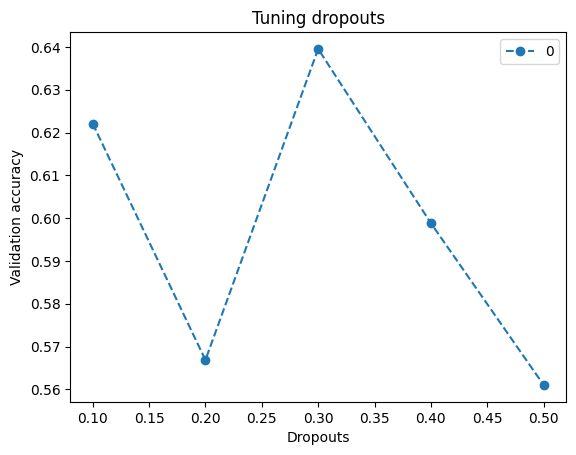

In [131]:
pd.DataFrame(dropout_accuracies.values(), index=dropout_accuracies.keys()).plot(
    title="Tuning dropouts", xlabel="Dropouts", ylabel="Validation accuracy", style = "--o"
)

In [138]:
for learning_rate in np.arange(.001,.012,.002):
    learning_rate = np.round(learning_rate,3)
    print(learning_rate)

0.001
0.003
0.005
0.007
0.009
0.011


In [142]:
learning_rate_accuracies = {}

for learning_rate in np.arange(.001,.01,.002):
    learning_rate = np.round(learning_rate,3)
    learning_rate_accuracies[learning_rate] = evaluate_model(learning_rate=learning_rate)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [119]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_test = pruned_y_test
y_pred = model.predict(x_test)
y_pred[:5]

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step


array([[0.19079727],
       [0.03173599],
       [0.43299395],
       [0.43018612],
       [0.49129474]], dtype=float32)

In [120]:
len(y_pred), len(y_test)

(412, 412)

In [121]:
y_pred[0], y_test[0]

(array([0.19079727], dtype=float32), 0)

In [122]:
y_pred[25], y_test[25]

(array([0.40048945], dtype=float32), 0)

In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

ValueError: Classification metrics can't handle a mix of binary and continuous targets